# Fibonachi

Import **matplotlib** library for visualazing.

In [1]:
import matplotlib.pyplot as plt

Define a **decorator** to **count function calls**. 

It count how many times function with certain value will be called when calcuting for example 10th Fibonachi.

In [2]:
def count_calls(counter):
    def decorator(func):
        def wrapper(x):
            counter[x] = 1 if x not in counter else counter[x]+1
            return func(x)
        return wrapper
    return decorator

In [3]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

In [13]:
test_num = 10

## Recursive

Recursive algorithm with no optimization.

### Algorithm

In [5]:
def Recursive_fib(x):
    counter = {}
    @count_calls(counter)
    def fib_recur(x):
        if x == 0 or x == 1:
            return 1
        else:
            return fib_recur(x-1) + fib_recur(x-2)
    return fib_recur(x),counter

### Growth

T(n) = **O(2^n)**

{1: 1, 2: 3, 3: 5, 4: 9, 5: 15, 6: 25, 7: 41, 8: 67, 9: 109, 10: 177}


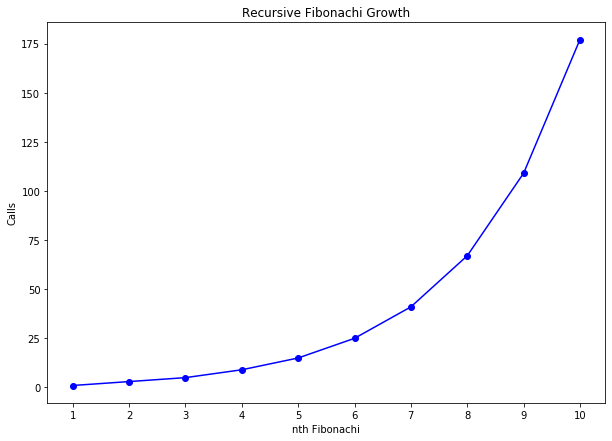

In [14]:
growth_rf = {}
l = []
for i in range(1,test_num+1):
    r,c = Recursive_fib(i)
    growth_rf[i] = get_total(c)
print(growth_rf)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_rf.items()))

plt.plot(values, calls,'b-o')
plt.xlabel('nth Fibonachi')
plt.ylabel('Calls')
plt.xticks(list(range(1,test_num+1)))
plt.title("Recursive Fibonachi Growth")

plt.show()

## Memoizing Algorithm

Recursive algorithm using a cache dictionary to memoising the results and speed up.

In [8]:
def Memoizing_fib(x):
    counter = {}
    cache = {}
    @count_calls(counter)
    def fib_memo(x):
        if x in cache:
            return cache[x]
        else:
            if x == 0 or x == 1:
                cache[x] = 1
                return cache[x]
            else:
                cache[x] = fib_memo(x-1) + fib_memo(x-2)
                return cache[x]
    return fib_memo(x),counter

### Growth

T(n) = O(n)


{1: 1, 2: 3, 3: 5, 4: 7, 5: 9, 6: 11, 7: 13, 8: 15, 9: 17, 10: 19}


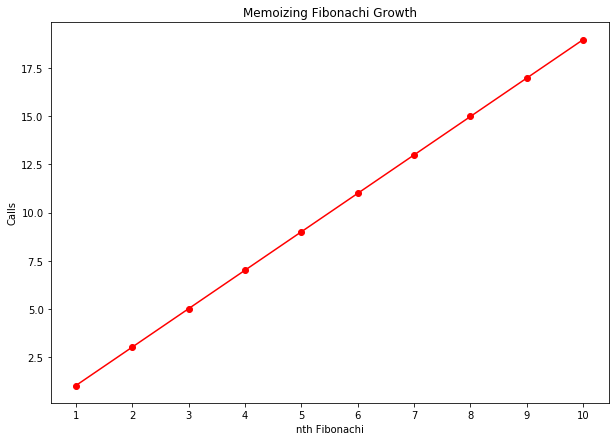

In [15]:
growth_mf = {}
l = []
for i in range(1,test_num+1):
    r,c = Memoizing_fib(i)
    growth_mf[i] = get_total(c)
print(growth_mf)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_mf.items()))

plt.plot(values, calls,'r-o')
plt.xlabel('nth Fibonachi')
plt.ylabel('Calls')
plt.xticks(list(range(1,test_num+1)))
plt.title("Memoizing Fibonachi Growth")

plt.show()

## Comparision

Recursive: {1: 1, 2: 3, 3: 5, 4: 9, 5: 15, 6: 25, 7: 41, 8: 67, 9: 109, 10: 177}
Memoizing: {1: 1, 2: 3, 3: 5, 4: 7, 5: 9, 6: 11, 7: 13, 8: 15, 9: 17, 10: 19}


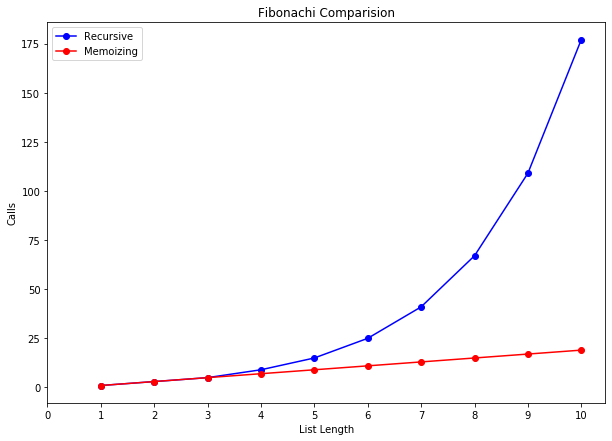

In [16]:
print("Recursive:",growth_rf)
print("Memoizing:",growth_mf)

plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(growth_rf.items()))
values2, calls2 = zip(*sorted(growth_mf.items()))

plt.plot(values, calls,'b-o',values2,calls2,'r-o')
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.title("Fibonachi Comparision")
plt.xticks(list(range(0,test_num+1)))
plt.legend(['Recursive','Memoizing'])

plt.show()